In [1]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
import progress_learner
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

p = project.Project.load("../slidearound_project.proj")

c = config.Config()
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

with tf.variable_scope("search") as scope:
    policy_estimator = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = progress_learner.EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress_SlideAround.mod')

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress_SlideAround.mod


In [2]:
c.progress_threshold=0.93
reload(action_learner_search)
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, session = sess)
explorations = action_ln.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.80531525611877441), (0, 0.78489834070205688), (0, 0.76284807920455933), (0, 0.75852584838867188), (0, 0.74978554248809814), (0, 0.74466896057128906), (0, 0.72581875324249268), (0, 0.69677233695983887), (0, 0.68087965250015259)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(3, 0.90980225801467896), (0, 0.90687853097915649), (1, 0.90645045042037964), (7, 0.9009854793548584), (1, 0.8848954439163208), (4, 0.88090038299560547), (6, 0.87794137001037598), (5, 0.87665504217147827), (6, 0.87233680486679077)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(0, 0.90980225801467896), (0, 0.90980225801467896), (0, 0.9098

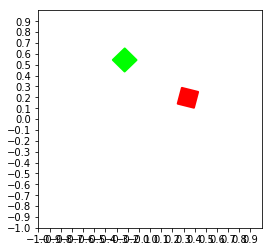

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.74882744  0.41410744  0.3032466 ]
[[ 0.   0.   0.   0.   0.   0.   1. ]
 [ 0.  -1.  -1.   0.   0.   0.   1. ]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]]
Progress = 0.76; reward = 0.76


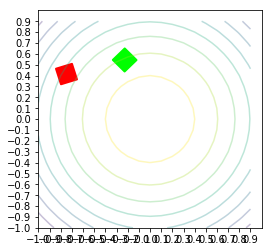

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.45370148  0.01100115 -0.48113114]
[[ 0.   0.   0.   0.   0.   0.   1. ]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   2.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.   1.   0.  -0.5]
 [ 1.  -1.  -1.   0.   1.   0.  -0.5]
 [ 0.  -1.  -1.   0.   1.   0.  -0.5]
 [ 1.  -1.  -1.   0.   1.   0.  -0.5]
 [ 0.   1.  -1.   0.   1.   0.  -1. ]
 [ 0.   0.   1.   0.   1.   0.  -1. ]
 [ 1.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   2.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]]
Progress = 0.91; reward = 0.15


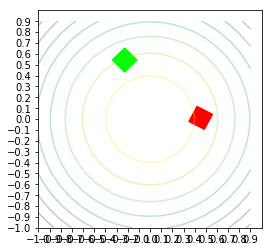

In [4]:
explorations[0].replay(verbose = True)

In [5]:
explorations[0].action_storage

[[0,
  [ 0.33926458  0.19575994  1.31933871] - 0.075,
  [-0.74882744  0.41410744  0.3032466 ] - 0.075,
  array([-0.69442284,  0.40319007,  0.3540512 , -0.74882744,  0.41410744,
          0.3032466 , -0.22741078,  0.54358846,  0.78001115, -0.22741078,
          0.54358846,  0.78001115]),
  0.75852585,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [-0.74882744  0.41410744  0.3032466 ] - 0.075,
  [ 0.45370148  0.01100115 -0.48113114] - 0.075,
  array([ 0.34096315,  0.04879278, -0.40759492,  0.45370148,  0.01100115,
         -0.48113114, -0.22741078,  0.54358846,  0.78001115, -0.22741078,
          0.54358846,  0.78001115]),
  0.90980226,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)]]